In [8]:
from pathlib import Path
import pandas as pd

df = pd.read_csv("../data/news_articles.csv", encoding="utf-8", delimiter='|', quotechar='~')
df.head()

,articleID,source,title,author,publish_date,location,content
0,121,All News Today,POK PROTESTS END IN ARRESTS,NaN,2005-04-06,"ELODIS, Kronos",Fifteen members of the Protectors of Kronos (P...
1,135,All News Today,RALLY SCHEDULED IN SUPPORT OF INCREASED GOVERN...,NaN,2012-04-09,"ABILA, Kronos","Silvia Marek, leader of the Protectors of Kron..."
2,152,All News Today,LACK OF DETAILS MARS GOVERNMENT INTENTIONS,NaN,1993-02-02,"ABILA, Kronos",In a glitzy press conference late last year Pr...
3,154,All News Today,"ELODIS, KRONOS: A TOWN IN NEED, Part One",NaN,1998-03-20,NaN,"NOTE: This article is the first in a series, r..."
4,237,All News Today,"ELODIS, KRONOS: WILL THE GOVERNMENT RESPOND IN...",NaN,1998-05-15,NaN,NOTE: This article is the last installment of ...


In [9]:
df = pd.read_csv("../data/work_history.csv", delimiter=',')
df.head()


,name,organization_type,organization_name,start_date,end_date,description
0,AdanMorlun,GAStech,GASTech,NaN,Present,GASTech - Kronos\t\tTruck Driver\t\t \t\t\t200...
1,AlbinaHafon,GAStech,GASTech,NaN,Present,GASTech - Kronos\t\tTruck Driver\t\t \t\t\t200...
2,AndaRibera,GAStech,GASTech,Unknown,Unknown,"GASTech – Abila, Kronos"
3,AxelCalzas,GAStech,GASTech,Unknown,Unknown,GASTech - Kronos
4,BertrandOvan,GAStech,GASTech,NaN,Present,GASTech - Kronos\t\tFacilities Group Manager \...


In [10]:
df["name"].value_counts()

name
IreneNant         2
CorneliaLais      2
ElsaOrilla        2
HidekiCocinaro    2
IsandeBorrasca    1
StenigFusil       1
RachelPantanal    1
NilsCalixto       1
MarinOnda         1
LoretoBodrogi     1
LinneaBergen      1
LidelseDedos      1
LarsAzada         1
IsiaVann          1
AdanMorlun        1
IsakBaza          1
AlbinaHafon       1
FelixResumir      1
FelixBalas        1
EmileArpa         1
DanteCoginian     1
ClaudioHawelon    1
BertrandOvan      1
AxelCalzas        1
AndaRibera        1
SvenFlecha        1
Name: count, dtype: int64

In [6]:
df[df["organization_type"] == "Government"]

,name,organization_type,organization_name,start_date,end_date,description
26,CorneliaLais,Government,Military,Unknown,Unknown,Military Service
27,ElsaOrilla,Government,issues with appropriate government,Unknown,Unknown,Coordinate location damage issues with appropr...
28,HidekiCocinaro,Government,with the various government,Unknown,Unknown,Interface with the various government entities...
29,IreneNant,Government,with company and government,Unknown,Unknown,Prepared accident reports in compliance with c...


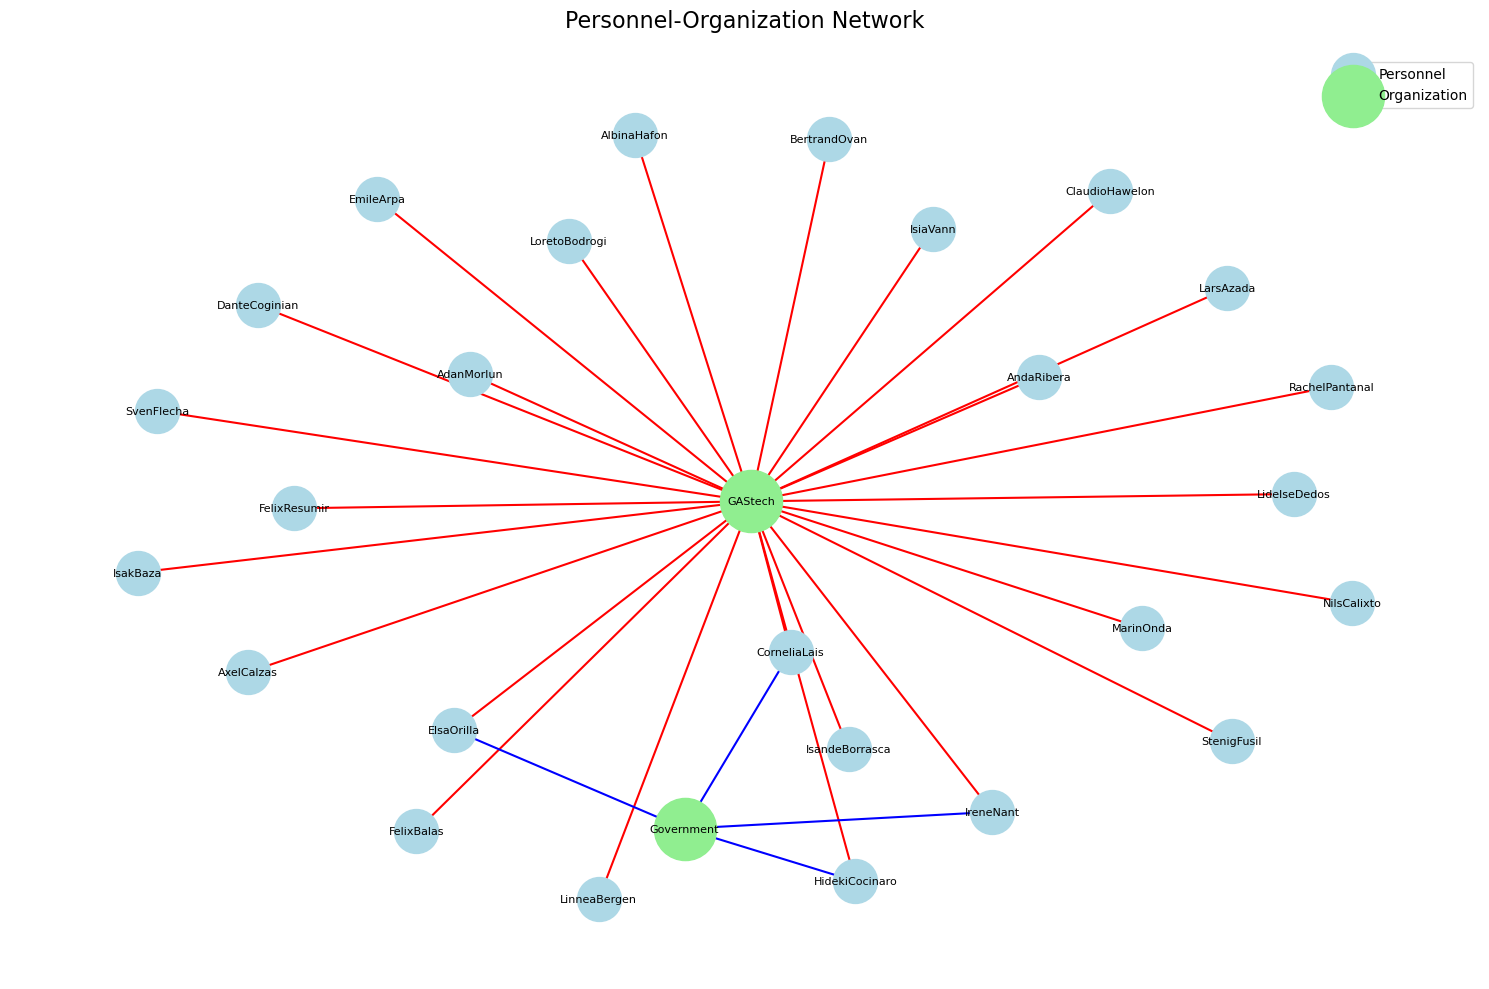

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
for _, row in df.iterrows():
    G.add_node(row["name"], type="person")
    G.add_node(row["organization_type"], type="organization")
    G.add_edge(row["name"], row["organization_type"], org_type=row["organization_type"])

# Create network graph using matplotlib
plt.figure(figsize=(15, 10))

# Set node positions 
pos = nx.spring_layout(G, k=1, iterations=50)

# Draw different types of nodes
person_nodes = [node for node, attr in G.nodes(data=True) if attr['type'] == 'person']
org_nodes = [node for node, attr in G.nodes(data=True) if attr['type'] == 'organization']

# Draw nodes
nx.draw_networkx_nodes(G, pos, nodelist=person_nodes, node_color='lightblue',
                      node_size=1000, label='Personnel')
nx.draw_networkx_nodes(G, pos, nodelist=org_nodes, node_color='lightgreen',
                      node_size=2000, label='Organization')

# Set edge colors based on organization type
edge_colors = []
for (u, v, d) in G.edges(data=True):
    if d['org_type'] == 'GAStech':
        edge_colors.append('red')
    elif d['org_type'] == 'Government':
        edge_colors.append('blue')
    else:
        edge_colors.append('gray')

# Draw edges
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=1.5)

# Add labels
nx.draw_networkx_labels(G, pos, font_size=8)

# Add legend
plt.legend()

# Set title
plt.title('Personnel-Organization Network', fontsize=16, pad=20)

# Display graph
plt.axis('off')
plt.tight_layout()
plt.show()


In [8]:
resume_file = Path(globals.DATA_PATH) / "email headers.csv"
df_emial = pd.read_csv(resume_file, encoding='latin1')
df_emial.head()


,From,To,Date,Subject
0,Varja.Lagos@gastech.com.kronos,"Varja.Lagos@gastech.com.kronos, Hennie.Osvaldo...",1/6/2014 10:28,Patrol schedule changes
1,Brand.Tempestad@gastech.com.kronos,"Birgitta.Frente@gastech.com.kronos, Lars.Azada...",1/6/2014 10:35,Wellhead flow rate data
2,Isak.Baza@gastech.com.kronos,"Isak.Baza@gastech.com.kronos, Lucas.Alcazar@ga...",1/6/2014 10:43,RE: GT-SeismicProcessorPro Bug Report
3,Lucas.Alcazar@gastech.com.kronos,"Isak.Baza@gastech.com.kronos, Lucas.Alcazar@ga...",1/6/2014 10:50,RE: GT-SeismicProcessorPro Bug Report
4,Linnea.Bergen@gastech.com.kronos,"Rachel.Pantanal@gastech.com.kronos, Lars.Azada...",1/6/2014 11:00,RE: Upcoming birthdays


In [52]:
import pandas as pd


resume_file = Path(globals.DATA_PATH) / "email headers.csv"
df_email = pd.read_csv(resume_file, encoding='latin1')

# column consistent
df_email = df_email[["From", "To", "Date", "Subject"]].dropna()
df_email.columns = ["sender", "recipients", "date", "subject"]

# split the same recipients to multiple lines
df_email["recipients"] = df_email["recipients"].str.split(",")
df_email = df_email.explode("recipients")

# clean data
df_email["sender"] = df_email["sender"].str.strip().str.lower()
df_email["recipients"] = df_email["recipients"].str.strip().str.lower()
df_email["sender"] = df_email["sender"].str.split("@").str[0]
df_email["recipients"] = df_email["recipients"].str.split("@").str[0]
df_email["subject"] = df_email["subject"].fillna("").str.lower()

# time type 
df_email["date"] = pd.to_datetime(df_email["date"], errors='coerce')

df_email.head()


,sender,recipients,date,subject
0,varja.lagos,varja.lagos,2014-01-06 10:28:00,patrol schedule changes
0,varja.lagos,hennie.osvaldo,2014-01-06 10:28:00,patrol schedule changes
0,varja.lagos,loreto.bodrogi,2014-01-06 10:28:00,patrol schedule changes
0,varja.lagos,inga.ferro,2014-01-06 10:28:00,patrol schedule changes
1,brand.tempestad,birgitta.frente,2014-01-06 10:35:00,wellhead flow rate data


In [53]:
df_email.shape

(8990, 4)

In [54]:
df_email["subject"].unique().shape

(303,)

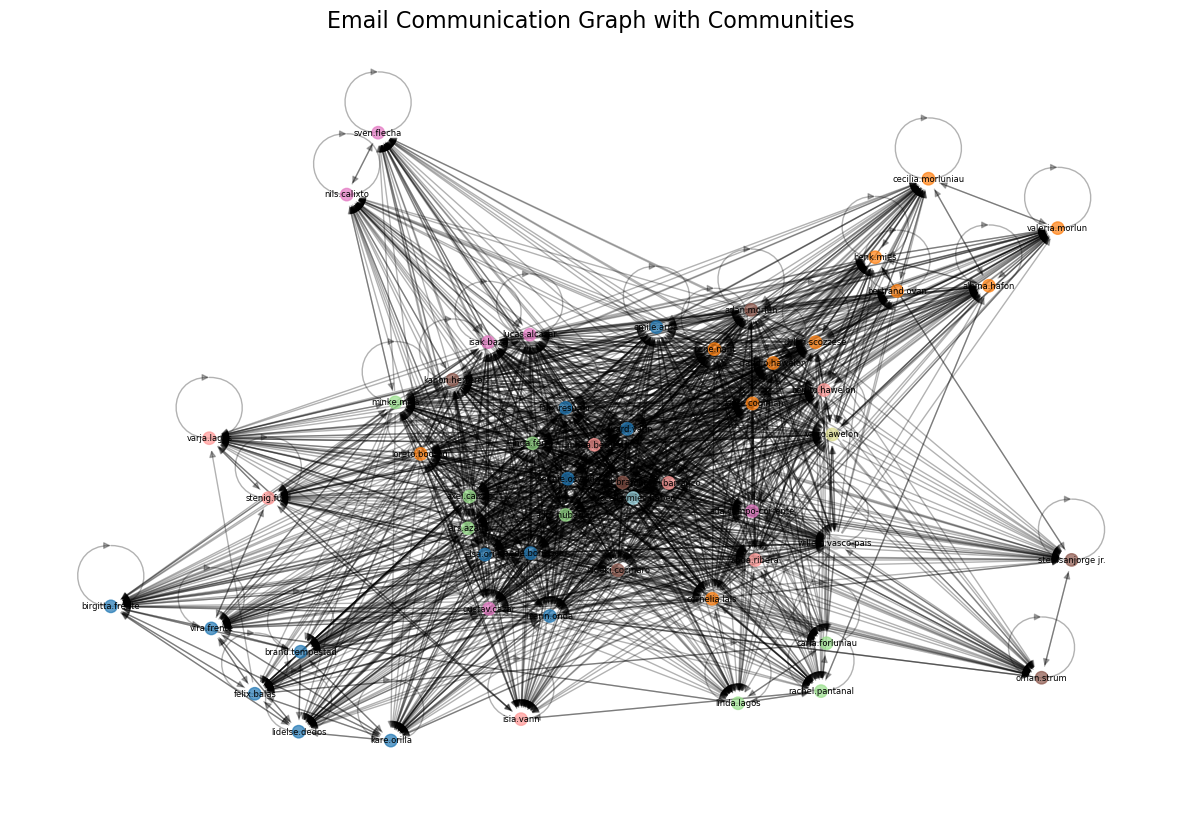

In [56]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


# 构建有向图
G = nx.DiGraph()
for row in df_email.itertuples():
    sender = row.sender
    recipient = row.recipients
    if sender and recipient:
        if G.has_edge(sender, recipient):
            G[sender][recipient]['weight'] += 1
        else:
            G.add_edge(sender, recipient, weight=1)

# PageRank 计算核心人物
pagerank_scores = nx.pagerank(G)
top_10 = sorted(pagerank_scores.items(), key=lambda x: x[1], reverse=True)[:10]

# 社区检测
from networkx.algorithms.community import greedy_modularity_communities
communities = list(greedy_modularity_communities(G.to_undirected()))

# 分配社区颜色
community_map = {}
for i, community in enumerate(communities):
    for name in community:
        community_map[name] = i

colors = [community_map.get(node, 0) for node in G.nodes()]

# 绘制图形
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, k=0.5, seed=42)
nx.draw_networkx_nodes(G, pos, node_color=colors, cmap=plt.cm.tab20, node_size=80, alpha=0.7)
nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=6)
plt.title("Email Communication Graph with Communities", fontsize=16)
plt.axis('off')
plt.show()


top_10_df = pd.DataFrame(top_10, columns=["Person", "PageRank_Score"])


In [29]:
top_10_df

,Person,PageRank_Score
0,henk.mies@gastech.com.kronos,0.032607
1,albina.hafon@gastech.com.kronos,0.027820
2,claudio.hawelon@gastech.com.kronos,0.027147
3,dylan.scozzese@gastech.com.kronos,0.026529
4,adan.morlun@gastech.com.kronos,0.025112
5,sven.flecha@gastech.com.kronos,0.024721
6,irene.nant@gastech.com.kronos,0.024628
7,nils.calixto@gastech.com.kronos,0.024262
8,valeria.morlun@gastech.com.kronos,0.024037
9,isak.baza@gastech.com.kronos,0.023275


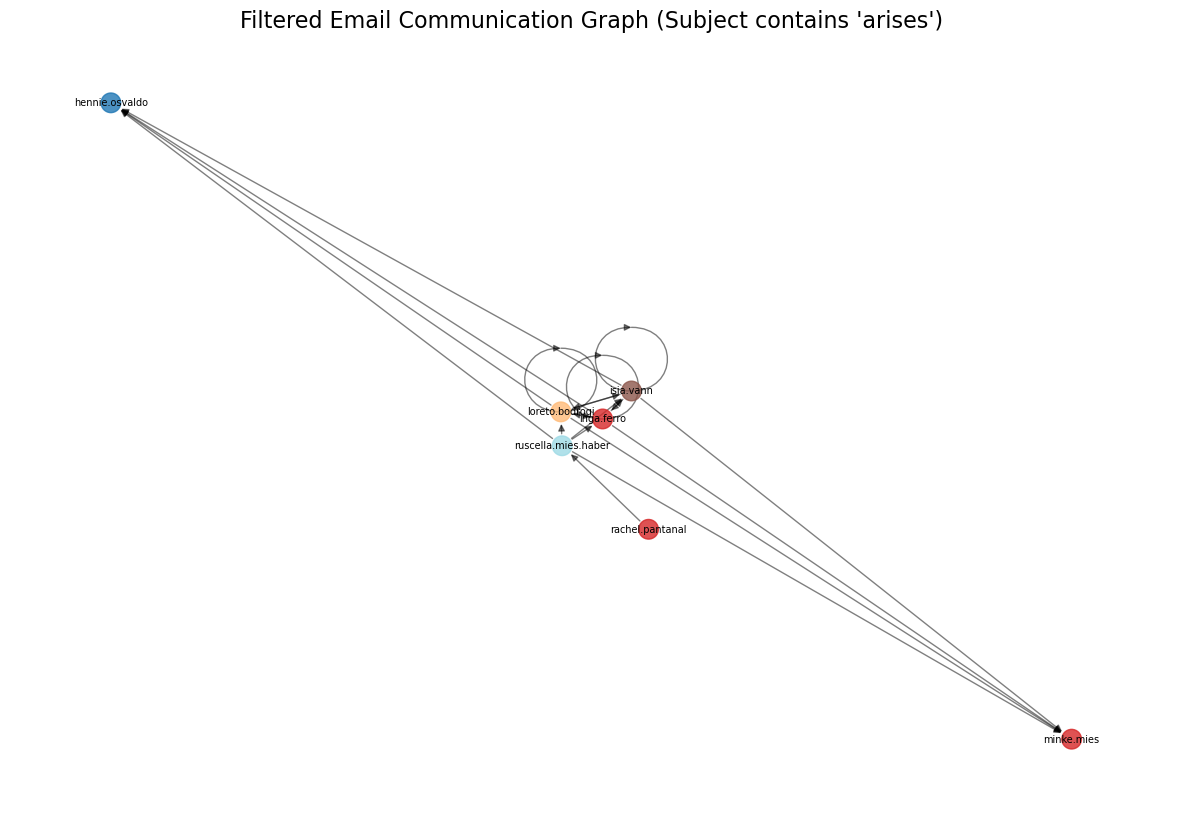

In [72]:
from networkx.algorithms.community import greedy_modularity_communities
communities = list(greedy_modularity_communities(G.to_undirected()))
community_map = {}
for i, community in enumerate(communities):
    for name in community:
        community_map[name] = i

# 对原图进行关键词filter
keywords = ['arise']
filtered_df = df_email[df_email["subject"].str.contains('|'.join(keywords), case=False)]

# 构建关键词相关子图
G_sub = nx.DiGraph()
for row in filtered_df.itertuples():
    sender = row.sender
    recipient = row.recipients
    if sender and recipient:
        if G_sub.has_edge(sender, recipient):
            G_sub[sender][recipient]['weight'] += 1
        else:
            G_sub.add_edge(sender, recipient, weight=1)

# 保留原community颜色
colors = [community_map.get(node, 0) for node in G_sub.nodes()]

# 绘制过滤后的子图
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G_sub, k=0.5, seed=42)
nx.draw_networkx_nodes(G_sub, pos, node_color=colors, cmap=plt.cm.tab20, node_size=200, alpha=0.8)
nx.draw_networkx_edges(G_sub, pos, alpha=0.5)
nx.draw_networkx_labels(G_sub, pos, font_size=7)
plt.title("Filtered Email Communication Graph (Subject contains 'arises')", fontsize=16)
plt.axis('off')
plt.show()

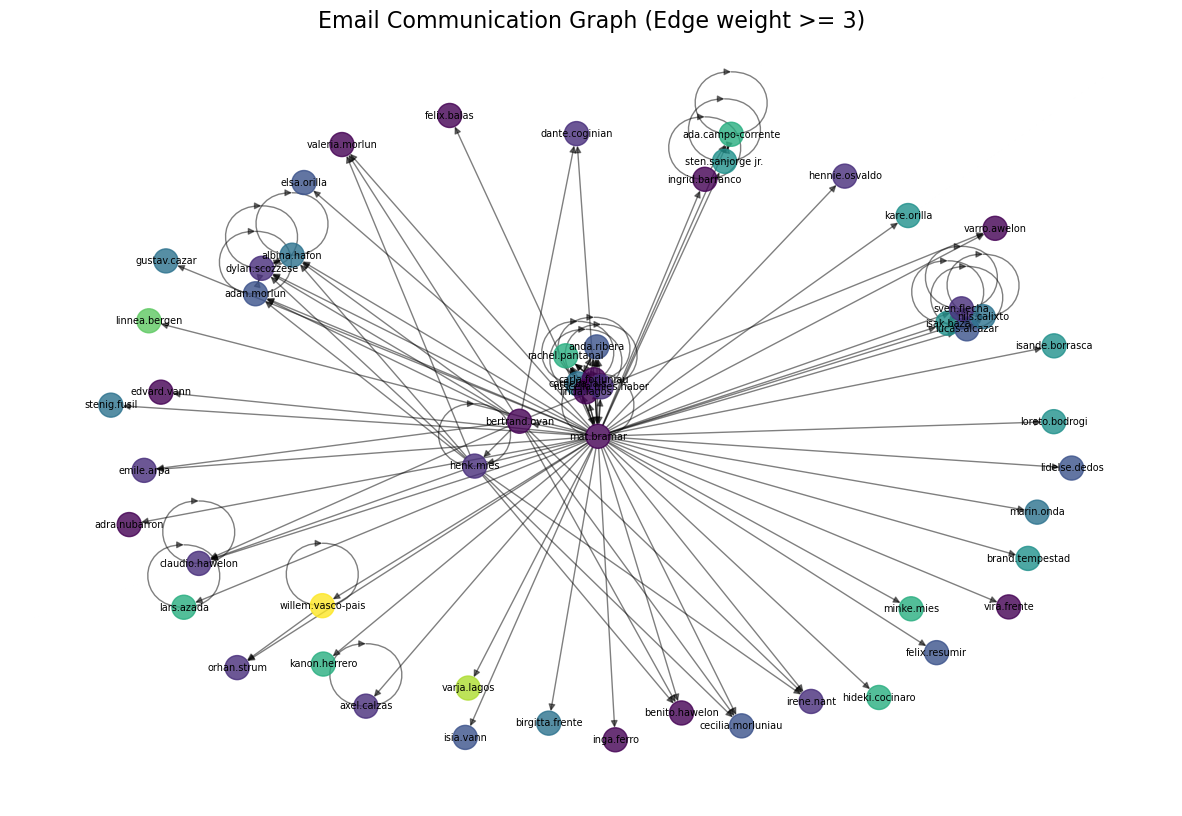

In [75]:

# 统计每对 sender-recipients 的邮件数量
edge_df = df_email.groupby(['sender', 'recipients']).size().reset_index(name='count')

# 构建图，并赋予 weight=邮件数量
G = nx.DiGraph()
for row in edge_df.itertuples():
    G.add_edge(row.sender, row.recipients, weight=row.count)

# 保留邮件数量 >= 3 的边
G_sub = nx.DiGraph([(u, v, d) for u, v, d in G.edges(data=True) if d['weight'] >= 15])
# 社区检测
from networkx.algorithms.community import greedy_modularity_communities
communities = list(greedy_modularity_communities(G.to_undirected()))

# 分配社区颜色
community_map = {}
for i, community in enumerate(communities):
    for name in community:
        community_map[name] = i

colors = [community_map.get(node, 0) for node in G.nodes()]
# 绘制图形
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G_sub, k=0.5, seed=42)
edge_weights = [d['weight'] for u, v, d in G_sub.edges(data=True)]

nx.draw_networkx_nodes(G_sub, pos, node_color=colors, node_size=300, alpha=0.8)
nx.draw_networkx_edges(G_sub, pos, width=1, alpha=0.5)
nx.draw_networkx_labels(G_sub, pos, font_size=7)

plt.title("Email Communication Graph (Edge weight >= 3)", fontsize=16)
plt.axis('off')
plt.show()


In [64]:
df_self_mail = df_email[df_email["sender"] == df_email["recipients"]]
keywords = ['flower', 'arise', 'freedom', 'gis']
df_suspicious = df_self_mail[df_self_mail["subject"].str.contains('|'.join(keywords), case=False)]
df_self_mail["sender"].value_counts().head(10)

lucas.alcazar          50
isak.baza              46
nils.calixto           43
sven.flecha            40
mat.bramar             37
henk.mies              27
ruscella.mies.haber    25
sten.sanjorge jr.      23
dylan.scozzese         22
cornelia.lais          21
Name: sender, dtype: int64

In [66]:
df_self_mail.shape

(805, 4)

In [67]:
df_suspicious.shape

(32, 4)

In [11]:
articles_df = pd.read_csv("../data/news_articles.csv", encoding="utf-8", sep="|", parse_dates=["publish_date"])
articles_df.set_index("articleID", inplace=True)
articles_df.sort_index(inplace=True)

sources = articles_df["source"].unique()
articles_df.head()

,source,title,author,publish_date,location,content
articleID,,,,,,
0,The Orb,BUMP OF PROTESTS IN ABILA IN RESPONSE TO THE C...,NaN,2012-09-08,"ABILA, Kronos",The thousands of people striped the roads Thur...
1,The Light of Truth,ENORMOUS IPO MAKES THE BILLIONAIRE OF SANJORGE,NaN,2013-12-18,"CENTRUM, Tethys",The president and CEO of GAStech international...
2,Everyday News,Global boxes of the charity of dren of the dis...,NaN,1999-11-16,NaN,The new pleas campaign in the horizon to maint...
3,The Tulip,PROMINENT Citizen dies at 65,NaN,1994-02-18,"CENTRUM, Tethys",Friday early after four years of diminishing h...
4,News Online Today,"ELODIS, KRONOS: HELP FROM AN UNEXPECTED SOURC...",NaN,1998-04-26,NaN,"NOTE: This article is the second in a series, ..."


In [12]:
import re
import spacy

# 1. 加载 spaCy
nlp = spacy.load("en_core_web_sm")

# 2. 白名单 ORG + 正确标签
CORRECT_LABELS = {
    "kronos": "ORG",
    "gastech": "ORG",
    "pok": "ORG",
    "apa": "ORG",
    "anti-pollution alliance": "ORG",
    "protectors of kronos": "ORG",
    "kronos government": "ORG"
}

# 3. 特殊归一化映射
SPECIAL_CASES = {
    "people of kronos": "pok",
    "the people of kronos": "pok",
    "protectors of kronos": "pok",
    "citizens of kronos": "pok",
    "members of kronos": "pok"
}

# 4. 清洗实体名字
def clean_entity_name(name):
    if not name:
        return ""
    name = name.strip()
    name = name.replace("抯", "'s")
    name = name.replace("揓", "J")
    name = name.replace("�", "")
    name = "".join(c for c in name if ord(c) < 128)  # 保留 ASCII
    return name

# 5. 标签修正 + 名字清洗
def correct_label(ent):
    text = clean_entity_name(ent.text.strip())  # 🛠 清洗名字
    text_lower = text.lower()
    
    for pattern, normalized_name in SPECIAL_CASES.items():
        if pattern in text_lower:
            return {"text": normalized_name, "label": "ORG"}
    
    if text_lower in CORRECT_LABELS:
        return {"text": text, "label": CORRECT_LABELS[text_lower]}
    
    elif ent.label_ == "PERSON":
        return {"text": text, "label": "PERSON"}
    
    else:
        return None

# 6. 提取实体
article_entities = []

for idx, row in articles_df.iterrows():
    content = row["content"]
    doc = nlp(content)

    ents = []
    seen = set()
    for ent in doc.ents:
        ent_info = correct_label(ent)
        if ent_info:
            key = (ent_info["text"], ent_info["label"])
            if key not in seen:
                ents.append(ent_info)
                seen.add(key)

    article_entities.append({
        "articleID": idx,
        "entities": ents
    })

# 7. 保存
with open("article_entities.json", "w", encoding="utf-8") as f:
    json.dump(article_entities, f, indent=2)


In [13]:
entities_df = pd.DataFrame(article_entities)
entities_df.to_json("article_entities.json", orient="records", indent=2)

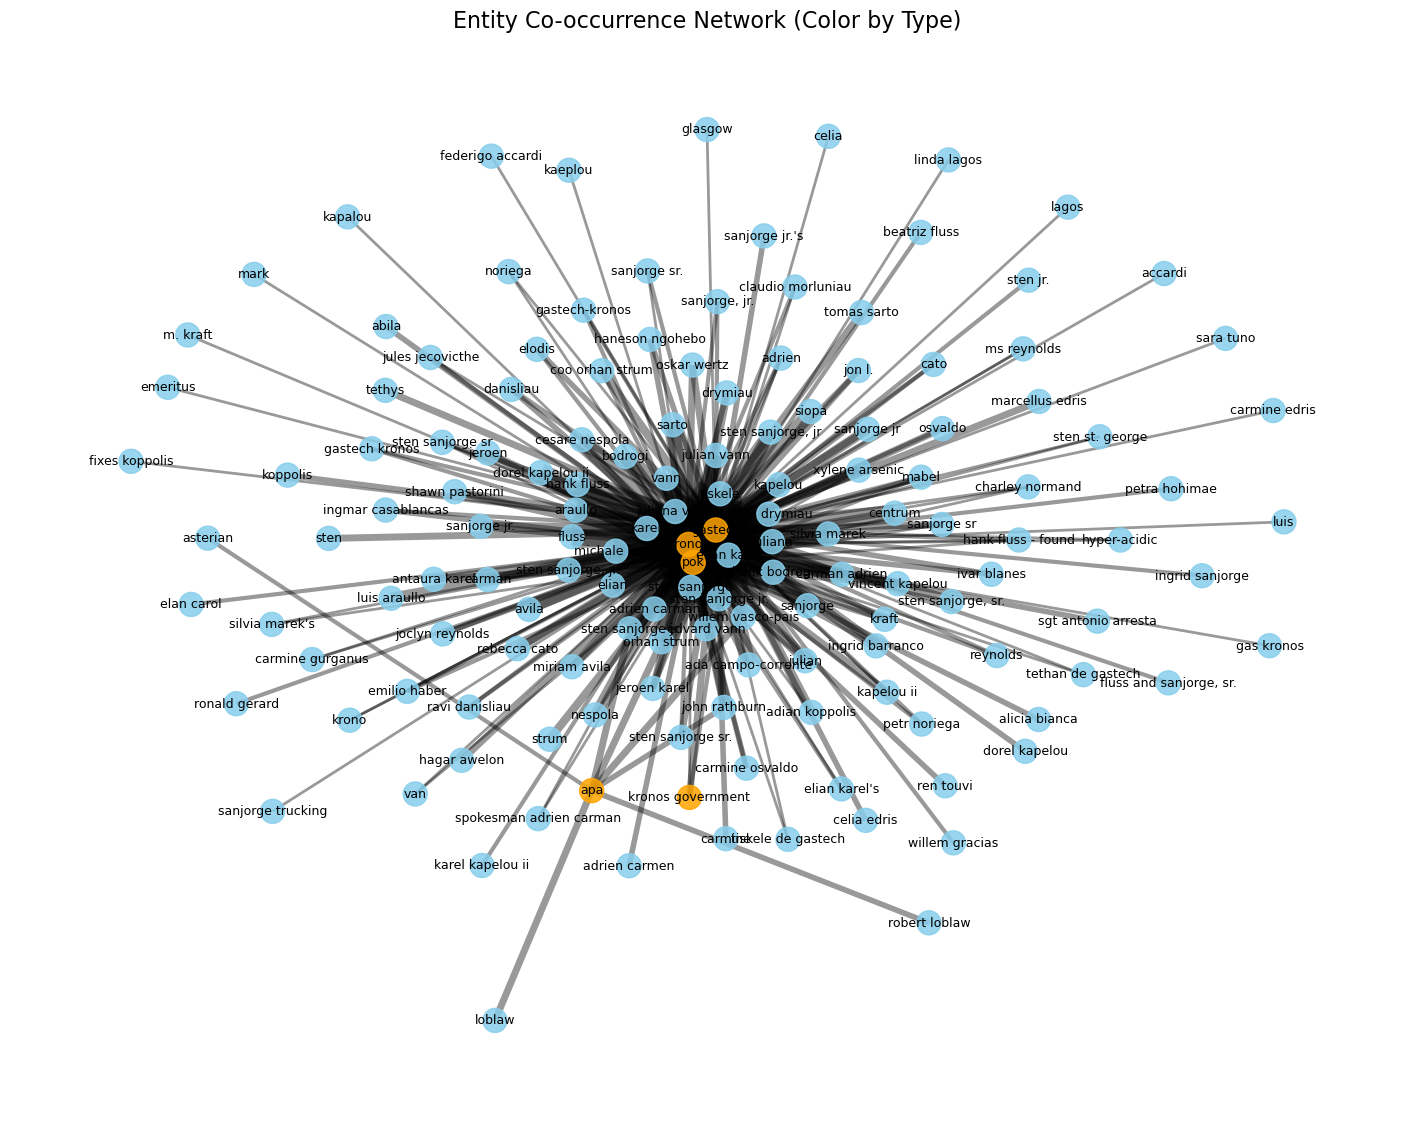

In [15]:
import json
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

# 加载实体 JSON（包含实体和标签）
with open('../data/article_entities.json', 'r', encoding='utf-8') as f:
    entity_data = json.load(f)

# 处理成共现关系并记录实体类型
cooccurrence = defaultdict(lambda: defaultdict(int))
entity_labels = {}  # 用于记录实体类型

for article in entity_data:
    entities = article["entities"]
    entity_texts = [e["text"].strip().lower() for e in entities]
    entity_types = {e["text"].strip().lower(): e["label"] for e in entities}

    unique_entities = list(set(entity_texts))
    for i in range(len(unique_entities)):
        for j in range(i + 1, len(unique_entities)):
            ent1 = unique_entities[i]
            ent2 = unique_entities[j]
            cooccurrence[ent1][ent2] += 1
            cooccurrence[ent2][ent1] += 1

    # 记录所有实体的类型（以最后一次为准）
    entity_labels.update(entity_types)


G = nx.Graph()
for ent1, neighbors in cooccurrence.items():
    ent1_is_org = entity_labels.get(ent1) == "ORG"
    for ent2, weight in neighbors.items():
        ent2_is_org = entity_labels.get(ent2) == "ORG"

        if weight >= 2:
            type1 = entity_labels.get(ent1)
            type2 = entity_labels.get(ent2)

            # ✅ 只连 ORG ↔ PERSON
            if {type1, type2} == {"ORG", "PERSON"}:
                G.add_edge(ent1, ent2, weight=weight)


# 分颜色绘制节点（根据 label）
color_map = []
for node in G.nodes():
    if entity_labels.get(node) == "PERSON":
        color_map.append("skyblue")
    elif entity_labels.get(node) == "ORG":
        color_map.append("orange")
    else:
        color_map.append("gray")

# 绘图
plt.figure(figsize=(18, 14))
pos = nx.spring_layout(G, k=0.5, seed=42)
weights = [d['weight'] for (_, _, d) in G.edges(data=True)]

nx.draw_networkx_nodes(G, pos, node_color=color_map, node_size=300, alpha=0.85)
nx.draw_networkx_edges(G, pos, width=weights, alpha=0.4)
nx.draw_networkx_labels(G, pos, font_size=9)

plt.title("Entity Co-occurrence Network (Color by Type)", fontsize=16)
plt.axis("off")
plt.show()


In [16]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_single_article(article_data, article_id):
    for article in article_data:
        if article["articleID"] == article_id:
            entities = article["entities"]
            break
    else:
        print(f"Article {article_id} not found.")
        return

    G = nx.Graph()
    entity_labels = {}
    entity_names = [e["text"].strip().lower() for e in entities]
    entity_types = {e["text"].strip().lower(): e["label"] for e in entities}

    for i in range(len(entity_names)):
        for j in range(i + 1, len(entity_names)):
            ent1 = entity_names[i]
            ent2 = entity_names[j]
            type1 = entity_types.get(ent1)
            type2 = entity_types.get(ent2)

            if {type1, type2} == {"ORG", "PERSON"}:
                G.add_edge(ent1, ent2)

    entity_labels.update(entity_types)

    # 上色
    color_map = []
    for node in G.nodes():
        if entity_labels.get(node) == "PERSON":
            color_map.append("skyblue")
        elif entity_labels.get(node) == "ORG":
            color_map.append("orange")
        else:
            color_map.append("gray")

    # 画图
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, k=0.7, seed=42)

    nx.draw_networkx_nodes(G, pos, node_color=color_map, node_size=500, alpha=0.9)
    nx.draw_networkx_edges(G, pos, width=1, alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_size=10)

    plt.title(f"Entity Co-occurrence in Article {article_id}", fontsize=14)
    plt.axis("off")
    plt.show()


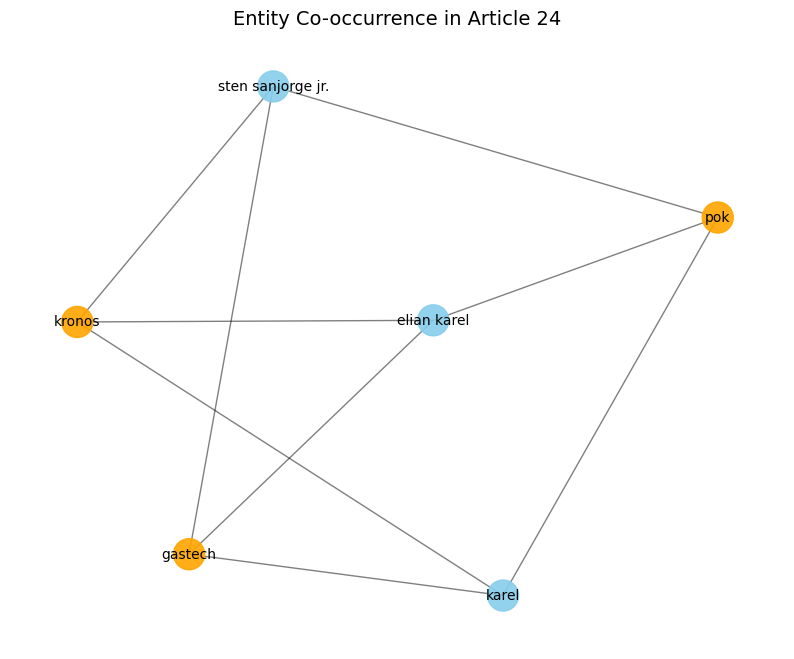

In [17]:
visualize_single_article(entity_data, article_id=24)


In [18]:
# Re-run the generation of Cypher import statements after environment reset

import json
import pandas as pd
from collections import defaultdict

# Reload article_entities.json
with open("../data/article_entities.json", "r", encoding="utf-8") as f:
    entity_data = json.load(f)

# Create structures
entity_records = []
cooccurrence_records = defaultdict(lambda: {"weight": 0, "articles": set()})
article_entity_records = []

def normalize_name(name):
    return name.strip().lower()

# Process each article
for article in entity_data:
    article_id = article["articleID"]
    entities = article["entities"]
    
    normalized_entities = {}
    for ent in entities:
        norm_text = normalize_name(ent["text"])
        normalized_entities[norm_text] = ent["label"]

        entity_records.append({"name": norm_text, "label": ent["label"]})
        article_entity_records.append({"article_id": article_id, "entity_name": norm_text})
    
    persons = [k for k, v in normalized_entities.items() if v == "PERSON"]
    orgs = [k for k, v in normalized_entities.items() if v == "ORG"]

    for person in persons:
        for org in orgs:
            key = tuple(sorted([person, org]))
            cooccurrence_records[key]["weight"] += 1
            cooccurrence_records[key]["articles"].add(article_id)

entities_df = pd.DataFrame(entity_records).drop_duplicates().reset_index(drop=True)
relations_df = pd.DataFrame([
    {
        "entity_1": e1,
        "entity_2": e2,
        "weight": data["weight"],
        "article_ids": ",".join(map(str, sorted(data["articles"])))
    }
    for (e1, e2), data in cooccurrence_records.items()
])

# Generate Cypher statements
cypher_statements = []

# Create entity nodes
for _, row in entities_df.iterrows():
    entity_name = row['name'].replace('"', '\\"')
    label = row['label']
    cypher_statements.append(f'CREATE (:{label} {{name: "{entity_name}"}});')

# Create relationships
for _, row in relations_df.iterrows():
    e1 = row['entity_1'].replace('"', '\\"')
    e2 = row['entity_2'].replace('"', '\\"')
    weight = row['weight']
    article_ids = row['article_ids']
    cypher_statements.append(
        f'''
        MATCH (a {{name: "{e1}"}}), (b {{name: "{e2}"}})
        CREATE (a)-[:CO_OCCURS_WITH {{weight: {weight}, article_ids: "{article_ids}"}}]->(b);
        '''
    )

# Save to .cypher file
cypher_path = "entity_graph_import.cypher"
with open(cypher_path, "w", encoding="utf-8") as f:
    for stmt in cypher_statements:
        f.write(stmt.strip() + "\n")

cypher_path


'entity_graph_import.cypher'

节点数量: 267
边数量: 469
⚠️ Warning: Missing node for edge karel抯 -> kronos
⚠️ Warning: Missing node for edge gastech -> karel抯
⚠️ Warning: Missing node for edge kronos -> 揓uliana
⚠️ Warning: Missing node for edge gastech -> 揓uliana
实际添加到图的边数量: 465


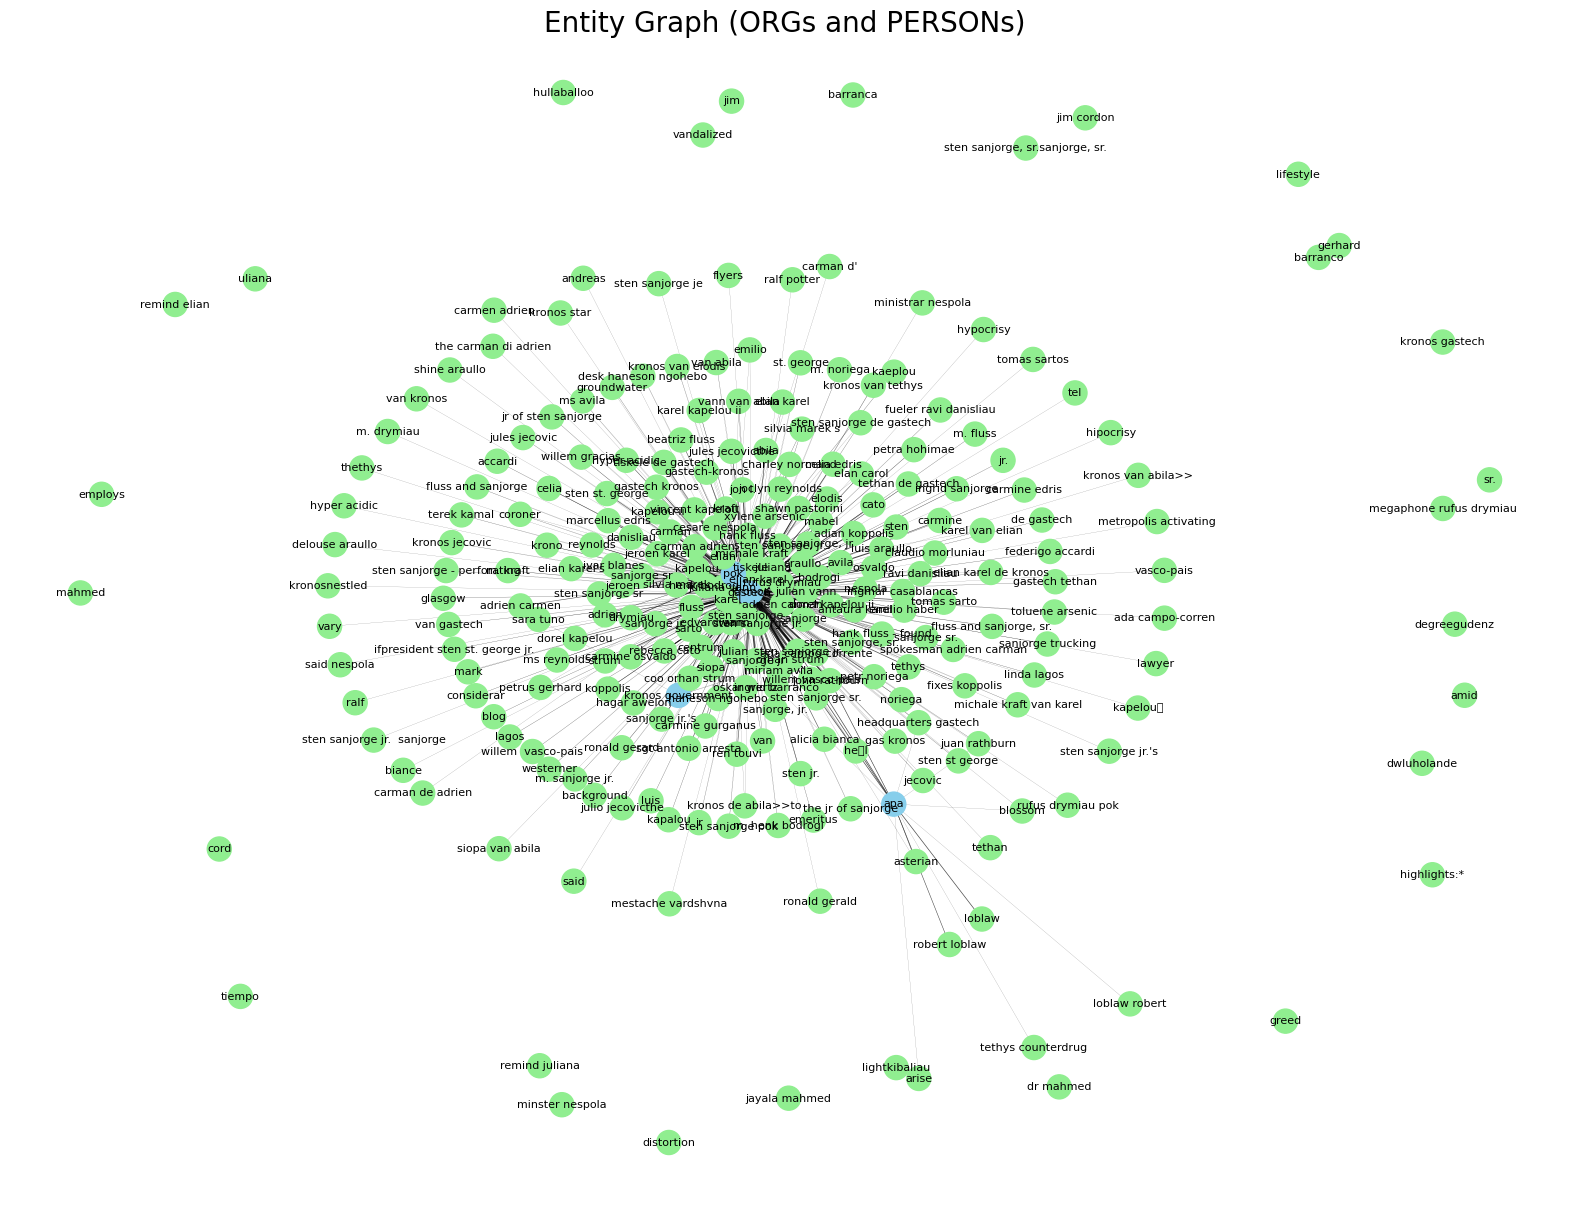

In [27]:
import networkx as nx
import matplotlib.pyplot as plt
import re

# 1. 解析 cypher 文件
cypher_file = 'entity_graph_import.cypher'

nodes = {}
edges = []

current_source = None
current_target = None

with open(cypher_file, 'r', encoding='utf-8') as f:
    for line in f:
        line = line.strip()
        
        # 解析节点
        if line.startswith("CREATE (") and "name:" in line:
            match = re.search(r'\(:([A-Z]+) \{name:\s*"([^"]+)"\}\)', line)
            if match:
                label, name = match.groups()
                nodes[name] = label
        
        # 解析MATCH行，记录source和target名字
        elif line.startswith("MATCH") and "{name:" in line:
            node_matches = re.findall(r'\{name:\s*"([^"]+)"\}', line)
            if len(node_matches) == 2:
                current_source, current_target = node_matches
            else:
                current_source, current_target = None, None

        # 解析CREATE行，根据之前MATCH到的source和target加边
        elif line.startswith("CREATE") and current_source and current_target:
            weight_match = re.search(r'weight:\s*(\d+)', line)
            if weight_match:
                weight = int(weight_match.group(1))
            else:
                weight = 1  # 如果没weight字段就默认1
            edges.append((current_source, current_target, weight))
            current_source, current_target = None, None  # 用完清空

# 输出节点和边数量
print(f"节点数量: {len(nodes)}")
print(f"边数量: {len(edges)}")

# 2. 建图
G = nx.Graph()

for name, label in nodes.items():
    G.add_node(name, label=label)

for source, target, weight in edges:
    if source in nodes and target in nodes:
        G.add_edge(source, target, weight=weight)
    else:
        print(f"⚠️ Warning: Missing node for edge {source} -> {target}")

print(f"实际添加到图的边数量: {G.number_of_edges()}")

# 3. 画图
plt.figure(figsize=(20, 15))

if G.number_of_edges() > 0:
    pos = nx.spring_layout(G, k=0.3, iterations=50, seed=42)

    color_map = []
    for node in G.nodes(data=True):
        if node[1]['label'] == 'ORG':
            color_map.append('skyblue')
        else:
            color_map.append('lightgreen')

    weights = [G[u][v]['weight'] / 10 for u, v in G.edges()]

    nx.draw_networkx_nodes(G, pos, node_color=color_map, node_size=300)
    nx.draw_networkx_edges(G, pos, width=weights, alpha=0.7)
    nx.draw_networkx_labels(G, pos, font_size=8)

    plt.title("Entity Graph (ORGs and PERSONs)", fontsize=20)
    plt.axis('off')
    plt.show()
else:
    print("⚠️ 依然没有有效的边，无法画出力导向图。")


In [28]:
print(f"Number of edges parsed: {len(edges)}")
print(f"Number of edges actually added to G: {G.number_of_edges()}")


Number of edges parsed: 469
Number of edges actually added to G: 465
